Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Epoch 1/50
11/11 [==============================] - 7s 226ms/step - loss: 1.9642 - accuracy: 0.3631 - val_loss: 1.5336 - val_accuracy: 0.3810 - lr: 0.0100
Epoch 2/50
11/11 [==============================] - 1s 77ms/step - loss: 1.4561 - accuracy: 0.4583 - val_loss: 1.2092 - val_accuracy: 0.4524 - lr: 0.0100
Epoch 3/50
11/11 [==============================] - 1s 93ms/step - loss: 1.2957 - accuracy: 0.4643 - val_loss: 1.3032 - val_accuracy: 0.4524 - lr: 0.0100
Epoch 4/50
11/11 [==============================] - 1s 87ms/step - loss: 1.1338 - accuracy: 0.4881 - val_loss: 1.2329 - val_accuracy: 0.4524 - lr: 0.0100
Epoch 5/50
11/11 [==============================] - 1s 71ms/step - loss: 1.1853 - accuracy: 0.4464 - val_loss: 1.0890 - val_accuracy: 0.3810 - lr: 0.0100
Epoch 6/50
11/11 [==============================] - 1s 71ms/step - loss: 0.9347 - accuracy: 0.5238 -

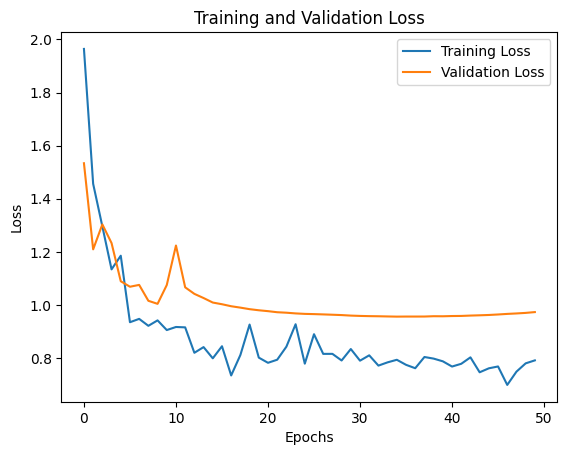

2/2 [==============================] - 1s 120ms/step
Accuracy: 0.4523809523809524


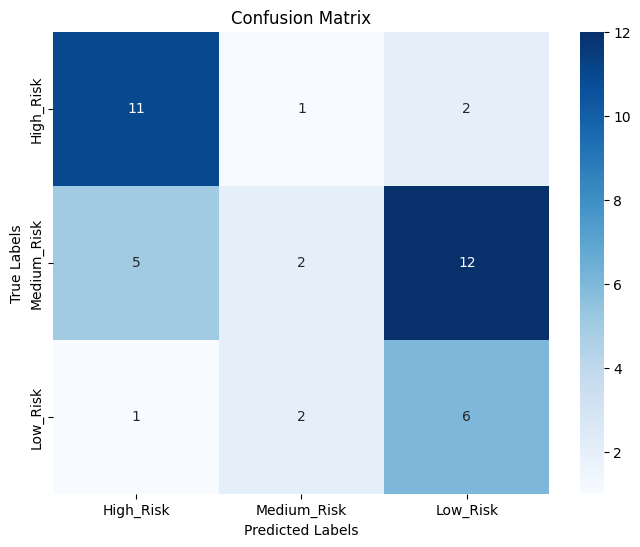

In [2]:
#Importing required libraries

#Generic
import numpy as np
import pandas as pd

#Tensorflow
import tensorflow as tf
import tensorflow_hub as hub
from keras import Sequential, layers,Model, Input
from keras.callbacks import ReduceLROnPlateau
from keras.optimizers import Adam
from keras.applications import ResNet50
from keras.layers import InputLayer, Dropout, Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

#Vizualization
import matplotlib.pyplot as plt

#Files
import os
from PIL import Image

#Dataset
from sklearn.model_selection import train_test_split

from google.colab import drive
drive.mount('/content/drive')

# Data Preprocessing
dataset_path = '/content/drive/MyDrive/Dataset'
categories = ['Tablet_Sheets', 'Ointments', 'Medicine_Bottles', 'Face_Masks', 'Syringes', 'Covid_Test_Kits', 'Asthma_Inhalers']
risks = ['High_Risk', 'Medium_Risk', 'Low_Risk']
image_size = (224, 224)

X = []
y = []

for category in categories:
    for risk in risks:
        risk_path = os.path.join(dataset_path, category, risk)
        for image_file in os.listdir(risk_path):
            image = Image.open(os.path.join(risk_path, image_file))
            if image.mode == 'RGBA':
                image = image.convert('RGB')

            # Resize the image
            image = image.resize(image_size)
            X.append(np.array(image))
            y.append(risks.index(risk))

# Convert the lists to numpy arrays
X = np.array(X)
y = np.array(y)

# Normalize the pixel values to be between 0 and 1
X = X / 255.0

# One-hot encode the target variable
y = tf.keras.utils.to_categorical(y, num_classes=len(risks))

# Splitting the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating and compiling the model
model, reduce_lr = create_model()

# Training the model
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_val, y_val), callbacks=[reduce_lr])

# Plotting training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Testing the model
y_pred = model.predict(X_val)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_val, axis=1)
accuracy = accuracy_score(y_true_classes, y_pred_classes)
print(f'Accuracy: {accuracy}')

# Plotting the confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=risks, yticklabels=risks)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()
